# Query.py Tutorial Doc

This tutorial shows you how to create, run, and make some basic plots from the DP1 and DP03 catalogs. 

The tutorial is split into two parts:
1. Creating and running queries
2. Plotting/summary print statements

For this tutotial, we'll be looking NEO objects. query.py contains a global dictionary that contains all searchable classes and their orbital parameters:

    "LPC": {"a_min": 50.0},
    "TNO": {"a_min": 30.1, "a_max": 50.0},
    "Ntrojan": {"a_min": 29.8, "a_max": 30.4},
    "NEO": {"q_max": 1.3, "a_max": 4.0, "e_max": 1.0},
    "MBA": {"q_min": 1.66, "a_min": 2.0, "a_max": 3.2},
    "Centaur": {"a_min": 5.5, "a_max": 30.1},
    "Jtrojan": {"a_min": 4.8, "a_max": 5.4, "e_max": 0.3},
    "JFC": {"tj_min": 2.0, "tj_max": 3.0}

The 'catalog' variable allows you to query different catalogs; the options are 'dp03_catalogs_10yr' and'dp1'.

The 'join' variable allows you to perform an inner join with either 'DiaSource' or 'SSObject'.

## 1. Creating and Running queries

First, we will show you a full example, and then provide more query examples for your reference. 

The first set of examples will use DP1. The examples at the bottom will use DP03. 

In [4]:
from lsst.rsp import get_tap_service
import sys
import os
sys.path.append(os.path.abspath('../../sso_query/'))
import query as q
import query_helpers as qh
import pandas as pd

After generating your desired query, it's time to run it. All examples can be run by uncommeting the 'q.run_query' line of code. 

The run_query function can return either an AstroPy table (to_pandas = False) or a Pandas dataframe (to_pandas = True). 

The function automatically prints the first few rows of your data. 

### Full example: DP03, combined NEO and LPC

In [2]:
# create the query
NEO_string, NEO_class_name = q.make_query(catalog = "dp03_catalogs_10yr", class_name = "NEO", cutoffs = None, join = "DiaSource", limit = 1000)
print(NEO_string)
LPC_string, LPC_class_name = q.make_query(catalog = "dp03_catalogs_10yr", class_name = "LPC", cutoffs = None, join = "DiaSource", limit = 1000)
print(LPC_string)

# run the query
NEO_data_table = q.run_query(NEO_string, NEO_class_name, "dp03_catalogs_10yr", to_pandas = True)
LPC_data_table = q.run_query(LPC_string, LPC_class_name, "dp03_catalogs_10yr", to_pandas = True)


Querying dp03_catalogs_10yr.DiaSource for: ['dias.magTrueVband', 'dias.band']
SELECT mpc.incl, mpc.q, mpc.e, mpc.ssObjectID, mpc.mpcDesignation, dias.magTrueVband, dias.band FROM dp03_catalogs_10yr.MPCORB AS mpc
    INNER JOIN dp03_catalogs_10yr.DiaSource AS dias ON mpc.ssObjectId = dias.ssObjectId
    WHERE mpc.q < 1.3 AND mpc.e < 1.0 AND mpc.q/(1-mpc.e) < 4.0
    LIMIT 1000;
Querying dp03_catalogs_10yr.DiaSource for: ['dias.magTrueVband', 'dias.band']
SELECT mpc.incl, mpc.q, mpc.e, mpc.ssObjectID, mpc.mpcDesignation, dias.magTrueVband, dias.band FROM dp03_catalogs_10yr.MPCORB AS mpc
    INNER JOIN dp03_catalogs_10yr.DiaSource AS dias ON mpc.ssObjectId = dias.ssObjectId
    WHERE mpc.q/(1-mpc.e) > 50.0
    LIMIT 1000;
Job phase is COMPLETED
  band        e       incl  magTrueVband mpcDesignation         q  \
0    r  0.82386  22.968456     30.019373       S0000AMJ  0.391082   
1    r  0.82386  22.968456     30.963600       S0000AMJ  0.391082   
2    i  0.82386  22.968456     30.019444 

In [5]:
main_example_table = qh.combine_tables(NEO_data_table, LPC_data_table)

### DP1 Examples
Because SSObject is a one-to-one match to the MPCORB catalog and DiaSource has multiple observations per object, note that the SSObject query will run much faster than the DiaSource query. 

When joining with DiaSource and SSObject, note the columns. Both tables have different columns in the DP03 and DP1 catalogs, be careful of this when plotting!

##### Ex 1: Class name provided, join with SSObject

In [6]:
string, class_name = q.make_query(catalog = "dp1", class_name = "NEO", cutoffs = None, join = "SSObject")
print(string)
# NEO_data_table = q.run_query(string, class_name, "dp1", to_pandas = True)

Querying dp1.SSObject for: ['sso.discoverySubmissionDate', 'sso.numObs']
SELECT mpc.incl, mpc.q, mpc.e, mpc.ssObjectID, mpc.mpcDesignation, sso.discoverySubmissionDate, sso.numObs FROM dp1.MPCORB AS mpc
    INNER JOIN dp1.SSObject AS sso ON mpc.ssObjectId = sso.ssObjectId
    WHERE mpc.q < 1.3 AND mpc.e < 1.0 AND mpc.q/(1-mpc.e) < 4.0;


##### Ex 2: Class name provided, join with DiaSource

In [4]:
string, class_name = q.make_query(catalog = "dp1", class_name = None, cutoffs = {"q_max": 1.3, "a_max": 4.0, "e_max": 1.0}, join = "DiaSource")
print(string)
# NEO_data_table = q.run_query(string, class_name, "dp1", to_pandas = True)

Querying dp1.DiaSource for: ['dias.apFlux', 'dias.apFlux_flag', 'dias.apFluxErr', 'dias.band']
SELECT mpc.incl, mpc.q, mpc.e, mpc.ssObjectID, mpc.mpcDesignation, dias.apFlux, dias.apFlux_flag, dias.apFluxErr, dias.band FROM dp1.MPCORB AS mpc
    INNER JOIN dp1.DiaSource AS dias ON mpc.ssObjectId = dias.ssObjectId
    WHERE mpc.q < 1.3 AND mpc.e < 1.0 AND mpc.q/(1-mpc.e) < 4.0;


### DP03 Examples

##### Ex 1: DP03, Class name provided, no join. 

In [3]:
string, class_name = q.make_query("dp03_catalogs_10yr", class_name = "NEO", cutoffs = None, join = None)
print(string)
# NEO_data_table = q.run_query(string, class_name, "dp03_catalogs_10yr", to_pandas = True)

SELECT mpc.incl, mpc.q, mpc.e, mpc.ssObjectID, mpc.mpcDesignation FROM dp03_catalogs_10yr.MPCORB AS mpc
    WHERE mpc.q < 1.3 AND mpc.e < 1.0 AND mpc.q/(1-mpc.e) < 4.0;


##### Ex 2: DP03, Class name provided, join table with DiaSource

In [4]:
string, class_name = q.make_query("dp03_catalogs_10yr", class_name = "NEO", cutoffs = None, join = "DiaSource")
print(string)
# NEO_data_table = q.run_query(string, class_name, "dp03_catalogs_10yr", to_pandas = True)

Querying dp03_catalogs_10yr.DiaSource for: ['dias.magTrueVband', 'dias.band']
SELECT mpc.incl, mpc.q, mpc.e, mpc.ssObjectID, mpc.mpcDesignation, dias.magTrueVband, dias.band FROM dp03_catalogs_10yr.MPCORB AS mpc
    INNER JOIN dp03_catalogs_10yr.DiaSource AS dias ON mpc.ssObjectId = dias.ssObjectId
    WHERE mpc.q < 1.3 AND mpc.e < 1.0 AND mpc.q/(1-mpc.e) < 4.0;


##### Ex 3: DP03, Cutoffs provided, no join

In [5]:
NEO_cutoffs = {"q_max": 1.3, "a_max": 4.0, "e_max": 1.0}

string, class_name = q.make_query("dp03_catalogs_10yr", class_name = None, cutoffs = NEO_cutoffs, join = None)
print(string)
print(class_name)
# NEO_data_table = q.run_query(string, class_name, "dp03_catalogs_10yr", to_pandas = True)

SELECT mpc.incl, mpc.q, mpc.e, mpc.ssObjectID, mpc.mpcDesignation FROM dp03_catalogs_10yr.MPCORB AS mpc
    WHERE mpc.q < 1.3 AND mpc.e < 1.0 AND mpc.q/(1-mpc.e) < 4.0;
NEO


##### Ex 4: DP03, Cutoffs provided, join with SSObject

In [5]:
string, class_name = q.make_query("dp03_catalogs_10yr", class_name = None, cutoffs = NEO_cutoffs, join = "SSObject")
print(string)
print(class_name)
# NEO_data_table = q.run_query(string, class_name, "dp03_catalogs_10yr", to_pandas = True)

Querying dp03_catalogs_10yr.SSObject for: ['sso.g_H', 'sso.r_H', 'sso.i_H', 'sso.discoverySubmissionDate', 'sso.numObs']
SELECT mpc.incl, mpc.q, mpc.e, mpc.ssObjectID, mpc.mpcDesignation, sso.g_H, sso.r_H, sso.i_H, sso.discoverySubmissionDate, sso.numObs, (sso.g_H - sso.r_H) AS g_r_color, (sso.r_H - sso.i_H) AS r_i_color FROM dp03_catalogs_10yr.MPCORB AS mpc
    INNER JOIN dp03_catalogs_10yr.SSObject AS sso ON mpc.ssObjectId = sso.ssObjectId
    WHERE mpc.q < 1.3 AND mpc.e < 1.0 AND mpc.q/(1-mpc.e) < 4.0;
NEO


## 2. Plotting + Summary Print Statements

The query_helpers.py module holds functions that create some useful summary plots and print statements. For our examples, we'll be looking at NEOs in the DP1 catalog. 

##### a vs. e, a vs. i

Index(['band', 'e', 'incl', 'magTrueVband', 'mpcDesignation', 'q',
       'ssObjectID', 'a', 'class_name'],
      dtype='object')


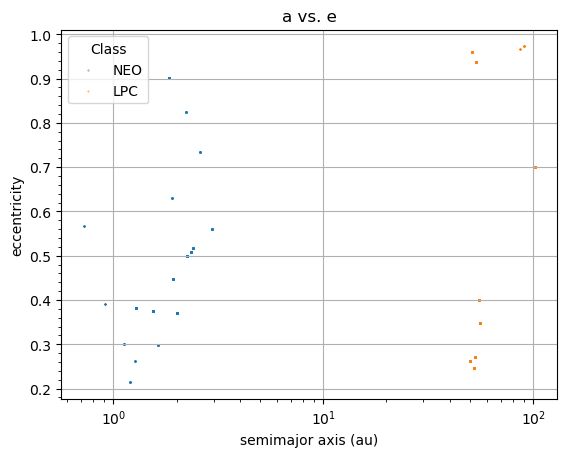

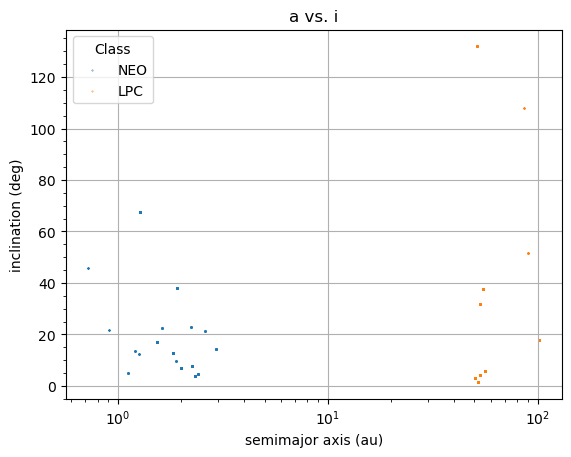

In [8]:
print(main_example_table.columns)

qh.plot_data(main_example_table, log = True)

##### Observations per object?

In [9]:
counts = qh.type_counts(main_example_table)

class_name
NEO    1000
LPC    1000
Name: count, dtype: int64


### Joined with DiaSource
##### Observations per object, by filter:

In [10]:
observations_by_object_filter = qh.obs_filter(main_example_table)

# of observations by Object: ssObjectID
7130799878658576849    380
6945356434253003225    202
6943965121319302771    192
7129516266284772407    146
7126134403324519710    125
7135062406265304485     98
6946978849104949313     93
7116175124439776228     86
6944025803906264269     84
6947086549701599546     77
6952398551183041121     61
7112654013333788833     53
6946846364482369862     51
7139937365086218089     49
7117921837937657416     45
6947189377618859972     45
6951441533523099400     38
6945272096356636968     25
6943940963192273862     24
6946641763099789984     22
6950785375934358136     22
6945497933279014827     18
6950562457293063928     18
6951342761878028904     13
7129207295544292510     12
6949506440316129304      8
6951675198317547606      7
7124118257423960911      6
Name: count, dtype: int64
# of observations by Filter: band
r    791
i    591
g    315
z    303
Name: count, dtype: int64
# of unique observations for each unique object, by filter:               ssObject

In [11]:
main_ex_with_mags = qh.data_grouped_mags(main_example_table)

qh.mag_range_plot(main_ex_with_mags, head_number = 5)

mag_range_plot

Standard Deviation of Range: 2.5741705894470215
Mean Range: 3.172876
Large range criterion: 8.321217


IndexError: single positional indexer is out-of-bounds